**a) Performing PCA for reducing the number of independent variables** - 

In [282]:
# Importing Necessary Libraries
#For Creating Arrays 
import numpy as np               
#For reading the data set
import pandas as pd  
#for Scaling the data
from sklearn.preprocessing import StandardScaler
#for PCA Analysis
from sklearn.decomposition import PCA
#For doing CLuster Analysis
from sklearn.cluster import KMeans
#For ploting the  diagram
import matplotlib.pyplot as plt  
#For Linear Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

In [283]:
#Uploading the Breast Cancer Dataset
from google.colab import files
upload=files.upload()


Saving Dataset.csv to Dataset (11).csv


In [284]:
# Reading the data from the dataset and storing it in the variable named data
import pandas as pd 
import io 
data = pd.read_csv(io.BytesIO(upload['Dataset.csv']))

In [285]:
#Showing the data
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [286]:
#Showing the names of columns from Breast Cancer Dataset
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [287]:
#Scaling the dataset features
x = data.loc[:,:].values
x = StandardScaler().fit_transform(x) #Scales the data features in the range [-1,1]
x.shape
x

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [288]:
# Specifying the no. of components for Scaled Data features
pca=PCA(n_components=2)
pcd=pca.fit_transform(x)

In [289]:
#Specifying pcd type
type(pcd)

numpy.ndarray

In [290]:
# Mapping the Scaled Data
mapped_data=pd.DataFrame(data = pcd, columns = ['principal_component_1','principal_component_2'])

In [291]:
#Showing the Mapped Data Feature
mapped_data.head()

,principal_component_1,principal_component_2
0,5.224155,3.204428
1,1.728094,-2.540839
2,3.969757,-0.550075
3,3.596713,6.905070
4,3.151092,-1.358072


Text(0, 0.5, 'Second principle component')

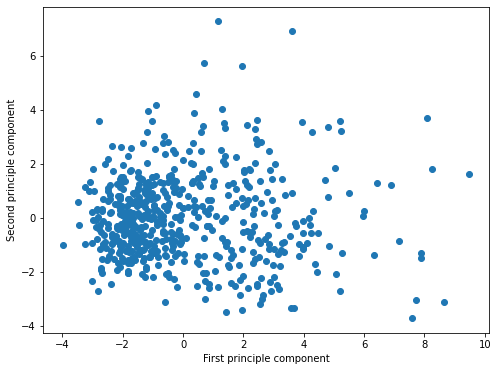

In [292]:
#Plotting the data
plt.figure(figsize=(8,6))
plt.scatter(pcd[:,0],pcd[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# b) On the dataset with reduced dimension, 

**Performing a scatter plot (in two or three dimensions), and doing cluster analysis**

In [ ]:
#Performing Clustering using K-means Cluster
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(mapped_data[['principal_component_1','principal_component_2']])
y_predicted

In [ ]:
#Showing the data
mapped_data['cluster']=y_predicted
mapped_data

In [ ]:
#Ploting Cluster Analysis
colors = np.where(mapped_data.cluster == 0, 'r',np.where(mapped_data.cluster == 1, 'b', 'g'))
plt.figure(figsize=(8,6))
plt.scatter(mapped_data.principal_component_1, mapped_data.principal_component_2, c=colors)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

**Choosing any one variable as dependent and the rest being independent and perform linear regression analysis**

In [280]:
#Logic for Setting up the Independent Variable in an Array
independent_variables=data.drop(['radius_mean'], axis=1).to_numpy()

In [ ]:
#Performing Linear Regression Analysis
radius_mean= data.iloc[:,0].values.reshape(-1,1)
Regression = LinearRegression()
Regression.fit(independent_variables,radius_mean)
print("R Square is", Regression.score(independent_variables,radius_mean))
print("Regression Co-efficient is", Regression.coef_)
print("Regression intercept is", Regression.intercept_)